In [1]:
# lets start with importing the required library 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
# as we can clearly see that some of the data's minimum value is '0' so we have to impute them with their mean values
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

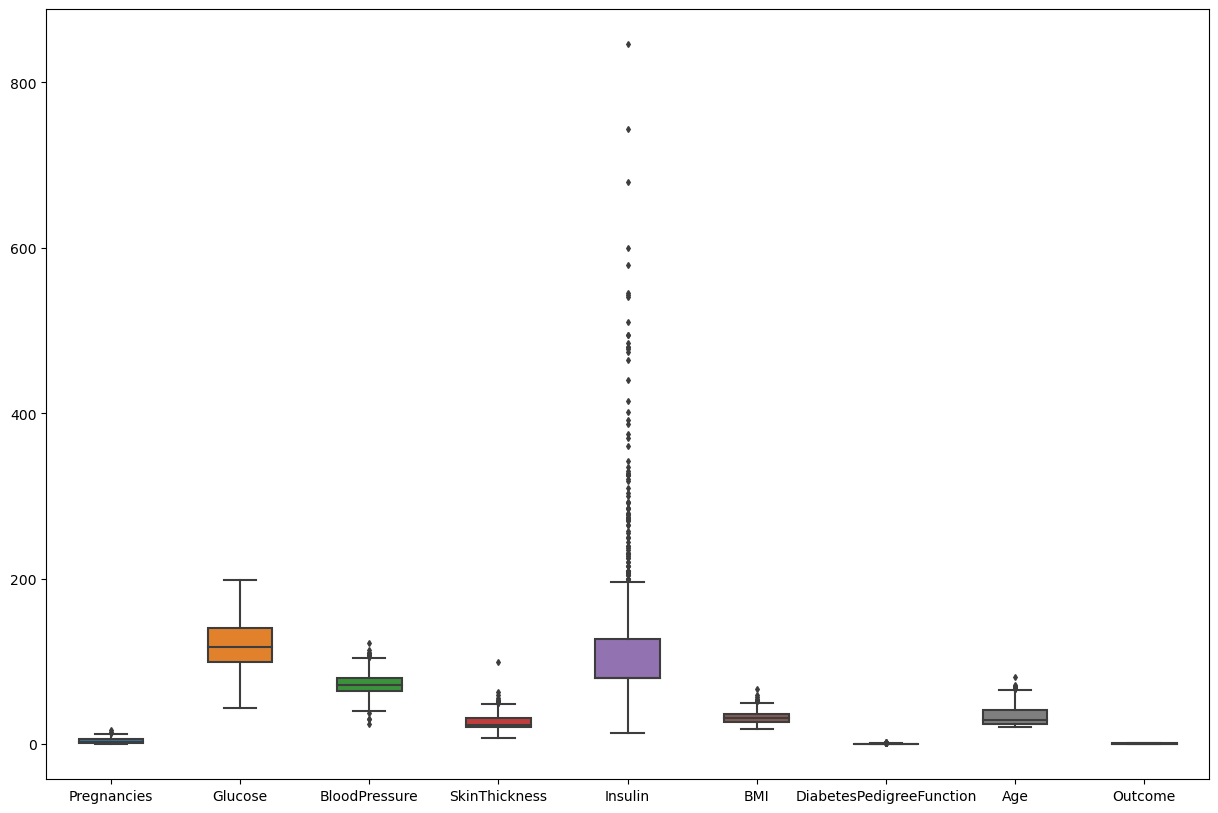

In [16]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width = 0.5,ax=ax , fliersize=3)

In [27]:
# segregate the dependent and independent variable 
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [28]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [38]:
# seperate the data into train and test 
X_train,X_test,y_train,y_test= train_test_split(x,y , test_size = 0.25 ,random_state = 0)
X_train.shape  ,X_test.shape

((576, 8), (192, 8))

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89.0,62.0,20.536458,79.799479,22.500000,0.142,33
127,1,118.0,58.0,36.000000,94.000000,33.300000,0.261,23
564,0,91.0,80.0,20.536458,79.799479,32.400000,0.601,27
375,12,140.0,82.0,43.000000,325.000000,39.200000,0.528,58
663,9,145.0,80.0,46.000000,130.000000,37.900000,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.900000,0.171,63
192,7,159.0,66.0,20.536458,79.799479,30.400000,0.383,36
629,4,94.0,65.0,22.000000,79.799479,24.700000,0.148,21
559,11,85.0,74.0,20.536458,79.799479,30.100000,0.300,35


In [37]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [45]:
import pickle
def scalar_standard(X_train,X_test):
    # scaling the data 
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(X_train)
    x_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('StandardScaler.pkl' ,'wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled ,x_test_scaled
    

In [46]:
X_train_scaled ,X_test_scaled = scalar_standard(X_train,X_test)

In [47]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [49]:
# hyperparameter tuning 
## grid search cv 
from sklearn.model_selection import GridSearchCV
import numpy as np 
import warnings 
warnings.filterwarnings('ignore') 

#parameter grid
parameter ={
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg' ,'lbfgs','liblinear']
}



In [51]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,param_grid=parameter,scoring='accuracy',cv = 10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [52]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
clf.best_score_

0.763793103448276

In [56]:
# lets test how our model performs on our test data 
y_pred = clf.predict(X_test_scaled)

In [57]:
confusion_matrix(y_test,y_pred)

array([[117,  13],
       [ 26,  36]], dtype=int64)

<Axes: >

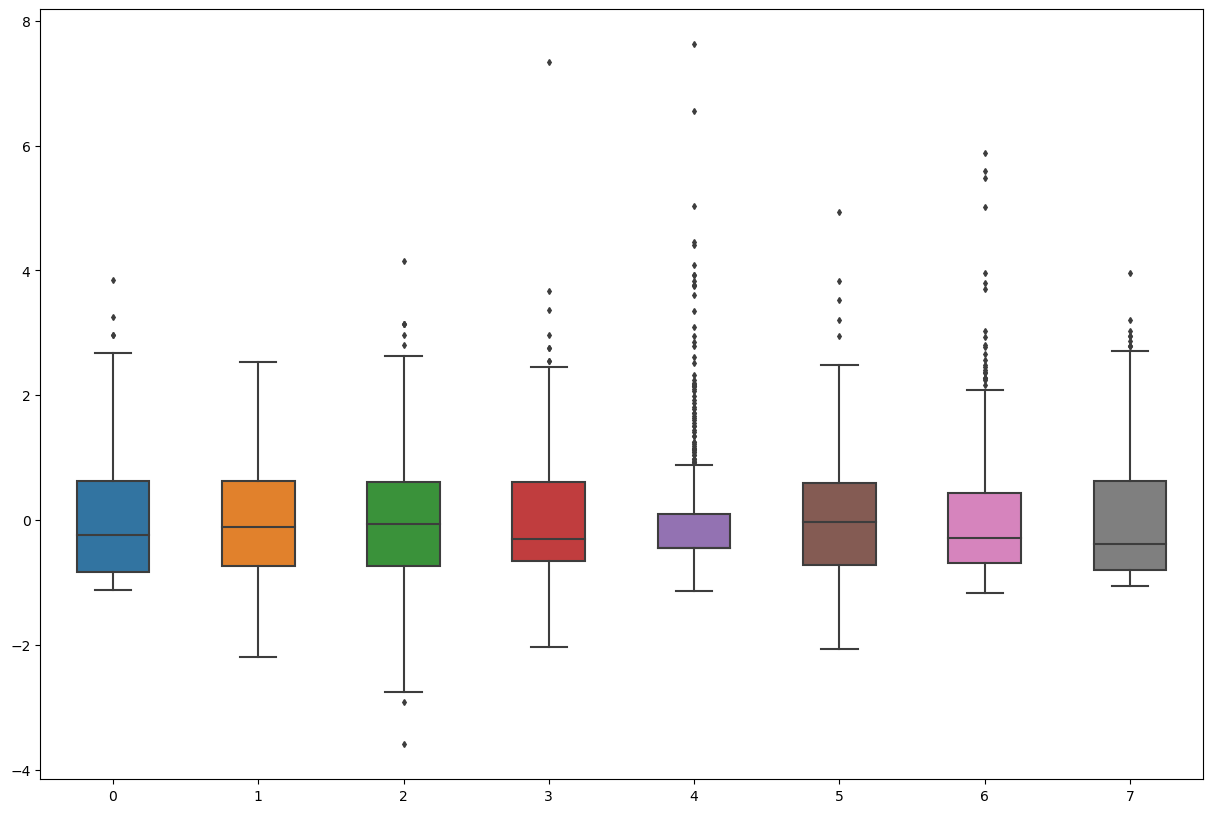

In [58]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train_scaled,width = 0.5,ax=ax , fliersize=3)

In [60]:
import pickle
file = open('ModelForPrediction.pkl','wb')
pickle.dump(clf , file)
file.close()